In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.api import qqplot

In [9]:
dta= pd.read_csv("sunspots.csv")
dta.head(10)

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
5,1705,58.0
6,1706,29.0
7,1707,20.0
8,1708,10.0
9,1709,8.0


In [10]:
dta.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


In [11]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [12]:
dta

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
...,...,...
304,2004,40.4
305,2005,29.8
306,2006,15.2
307,2007,7.5


# Preparing the Data

Next we need to do a little dataset preparation. Here, an annual date series must be date-times at the end of the year.

In [13]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [14]:
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


# Examine the Data

Now we take a look at the data.

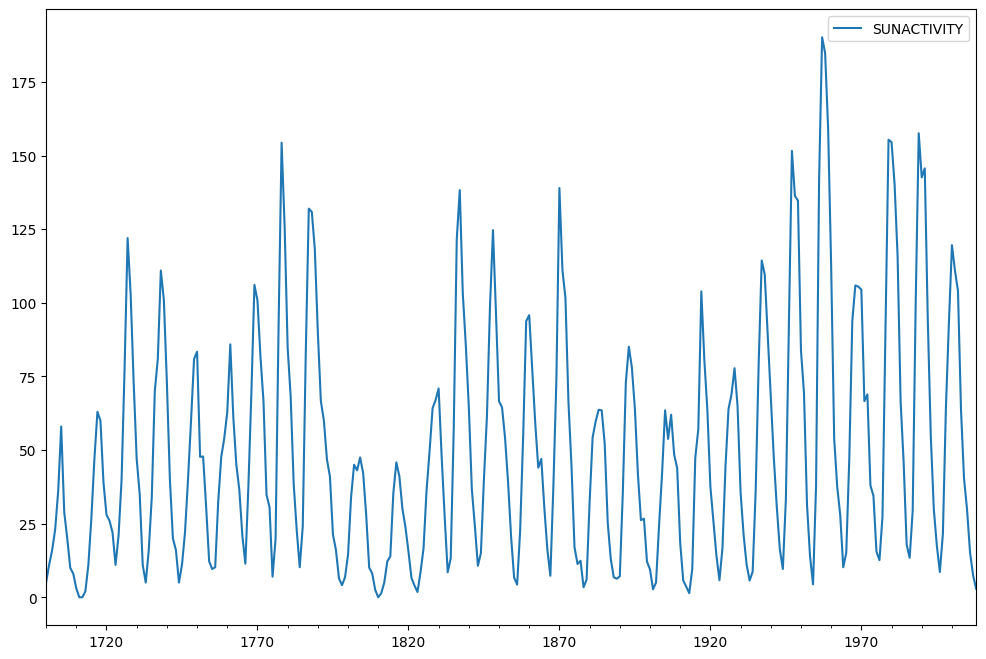

In [15]:

# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));

In [16]:
sm.stats.durbin_watson(dta) ## to check autocorreation

array([0.13952893])

The value of Durbin-Watson statistic is close to 2 if the data are uncorrelated. In our example, it is 0.1395. That means that there is a strong evidence that the variable open has high autocorrelation.

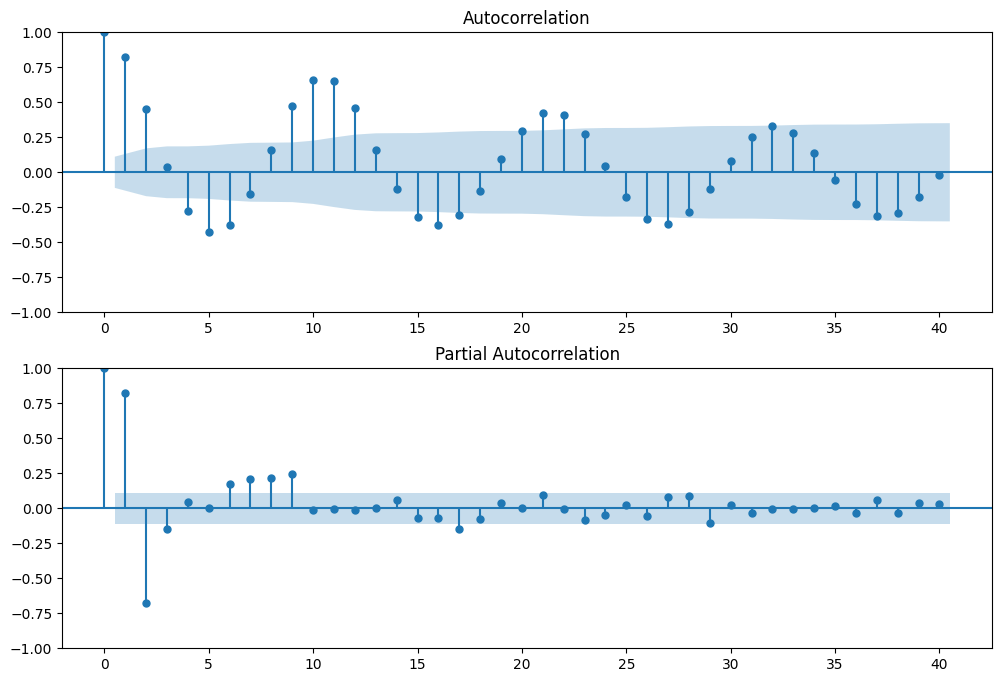

In [17]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags. The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

# Modeling the Data

In [44]:
p = 2
d = 0
q = 0
s = 6

#CHOOSING THE SEASONAL TERM AS 6 BECAUSE IF YOU VIEW THE DATA, THE SEASONALITY IS IN THE RANGE OF 6-8 MONTHS. That's why seasonal term is chosen as 6


sarima_mod20 = SARIMAX(dta, order=(p, d, q), seasonal_order=(p, d, q, s)).fit()
print(sarima_mod20.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                       SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 6)   Log Likelihood               -1338.149
Date:                           Fri, 13 Oct 2023   AIC                           2686.297
Time:                                   14:51:49   BIC                           2704.964
Sample:                               12-31-1700   HQIC                          2693.760
                                    - 12-31-2008                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3801      0.042     33.080      0.000       1.298       1.462
ar.L2         -0.6619      0.038    -17.637

We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [45]:
print(sarima_mod20.aic, sarima_mod20.bic, sarima_mod20.hqic)

2686.297314201537 2704.964020586026 2693.7602990080945


Does our model obey the theory? We will use the Durbin-Watson test for autocorrelation. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [46]:
sm.stats.durbin_watson(sarima_mod20.resid.values)

2.0879870408158556

 The Durbin-Watson test shows no autocorrelation.


## Plotting the Data

Next we plot and study the data it represents.



## Predictions

Next, we compute the predictions and analyze their fit against actual values.

In [47]:
predict_sunspots20 = sarima_mod20.predict('1990', '2012', dynamic=False)
print(predict_sunspots20)

1990-12-31    182.829477
1991-12-31    109.605795
1992-12-31    112.019668
1993-12-31     50.806791
1994-12-31     39.510005
1995-12-31     14.743383
1996-12-31     13.867803
1997-12-31     13.188336
1998-12-31     28.107209
1999-12-31     88.430127
2000-12-31    116.519141
2001-12-31    121.164381
2002-12-31     71.833438
2003-12-31     95.638046
2004-12-31     24.531256
2005-12-31     26.275310
2006-12-31     29.257921
2007-12-31      7.898161
2008-12-31      9.460823
2009-12-31      5.499286
2010-12-31     26.376527
2011-12-31     43.993227
2012-12-31     56.157654
Freq: A-DEC, Name: predicted_mean, dtype: float64


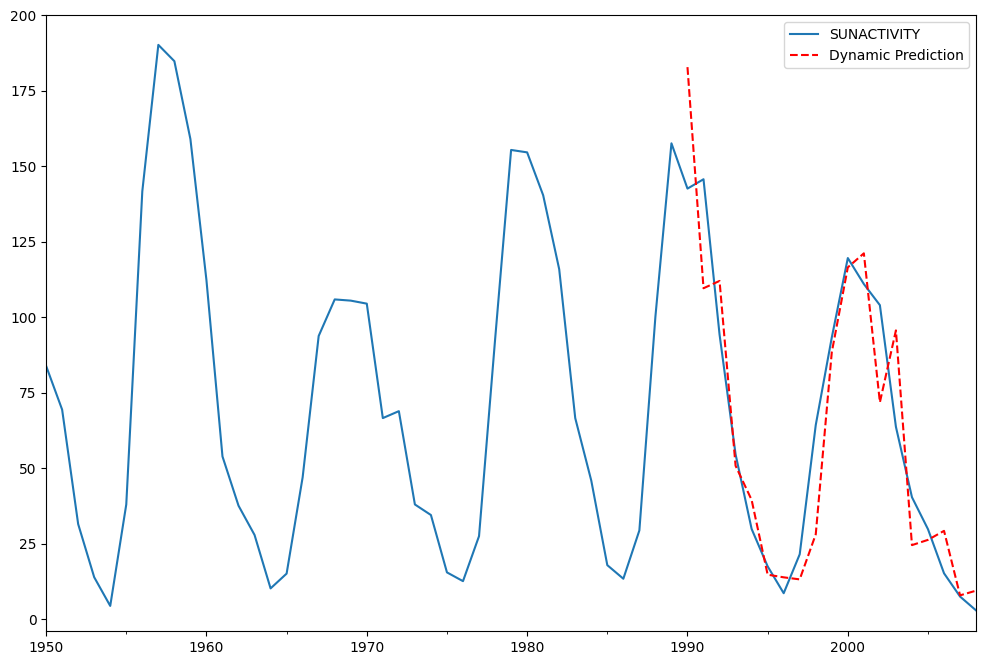

In [48]:
ax = dta.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

The fit looks good up to about 1998 and underfit the data afterwards.

## Calculate Forecast Errors

#### Mean absolute error:
The mean absolute error (MAE) value is computed as the average absolute error value. If this value is 0 (zero), the fit (forecast) is perfect. As compared to the mean squared error value, this measure of fit will “de-emphasize” outliers, that is, unique or rare large error values will affect the MAE less than the MSE value.

#### Mean Forecast Error (Bias).
The mean forecast error (MFE) is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations, and a large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal.

The MAE is a better indicator of fit than the MFE.

In [49]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [50]:
print("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20))

MFE =  0.5638383308062449
MAE =  0.02397483185144942


For MFE > 0, models tends to under-forecast. However, as long as the tracking signal is between –4 and 4, we assume the model is working correctly. The measure of MAE being small would indicate a pretty good fit.